<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_6)_n60_01_ipynb1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.030904,46.428593,51.949864,-21.317728,124.091634,143.065409,-18.973775
1,0.0,1.0,51.204694,82.486571,45.299681,-6.621400,182.369546,182.352914,0.016632
2,0.0,2.0,55.930428,33.612531,82.581599,6.649154,188.773713,183.555788,5.217925
3,0.0,3.0,30.478140,26.253220,98.205337,4.353621,169.290318,166.295425,2.994893
4,0.0,4.0,45.258794,54.175939,70.749115,-14.147648,166.036200,177.807889,-11.771689
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.551073,48.943111,67.868087,16.752570,198.114842,180.702690,17.412152
59996,999.0,56.0,63.581612,33.831449,65.445921,-9.190777,163.668205,172.528169,-8.859964
59997,999.0,57.0,83.810247,66.413880,80.077099,28.085104,268.386330,255.228857,13.157473
59998,999.0,58.0,54.901457,44.392501,36.286463,5.199148,150.779569,140.432464,10.347104


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.030904,46.428593,51.949864,-21.317728,124.091634,143.065409,-18.973775
1,0.0,1.0,51.204694,82.486571,45.299681,-6.621400,182.369546,182.352914,0.016632
2,0.0,2.0,55.930428,33.612531,82.581599,6.649154,188.773713,183.555788,5.217925
3,0.0,3.0,30.478140,26.253220,98.205337,4.353621,169.290318,166.295425,2.994893
4,0.0,4.0,45.258794,54.175939,70.749115,-14.147648,166.036200,177.807889,-11.771689
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.551073,48.943111,67.868087,16.752570,198.114842,180.702690,17.412152
59996,999.0,56.0,63.581612,33.831449,65.445921,-9.190777,163.668205,172.528169,-8.859964
59997,999.0,57.0,83.810247,66.413880,80.077099,28.085104,268.386330,255.228857,13.157473
59998,999.0,58.0,54.901457,44.392501,36.286463,5.199148,150.779569,140.432464,10.347104


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    37.030904  46.428593  51.949864  ...  124.091634  143.065409 -18.973775
      1.0    51.204694  82.486571  45.299681  ...  182.369546  182.352914   0.016632
      2.0    55.930428  33.612531  82.581599  ...  188.773713  183.555788   5.217925
      3.0    30.478140  26.253220  98.205337  ...  169.290318  166.295425   2.994893
      4.0    45.258794  54.175939  70.749115  ...  166.036200  177.807889 -11.771689
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   54.551073  48.943111  67.868087  ...  198.114842  180.702690  17.412152
      56.0   63.581612  33.831449  65.445921  ...  163.668205  172.528169  -8.859964
      57.0   83.810247  66.413880  80.077099  ...  268.386330  255.228857  13.157473
      58.0   54.901457  44.392501  36.286463  ...  150.779569  140.432464  10.347104
      59.0   25.865073  51.876393  89.883028  ...  175.106604  169.419516   5.687089

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    37.030904  46.428593  51.949864  ...  124.091634  143.065409 -18.973775
      1.0    51.204694  82.486571  45.299681  ...  182.369546  182.352914   0.016632
      2.0    55.930428  33.612531  82.581599  ...  188.773713  183.555788   5.217925
      3.0    30.478140  26.253220  98.205337  ...  169.290318  166.295425   2.994893
      4.0    45.258794  54.175939  70.749115  ...  166.036200  177.807889 -11.771689
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   54.551073  48.943111  67.868087  ...  198.114842  180.702690  17.412152
      56.0   63.581612  33.831449  65.445921  ...  163.668205  172.528169  -8.859964
      57.0   83.810247  66.413880  80.077099  ...  268.386330  255.228857  13.157473
      58.0   54.901457  44.392501  36.286463  ...  150.779569  140.432464  10.347104
      59.0   25.865073  51.876393  89.883028  ...  175.106604  169.419516   5.687089

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.030904,46.428593,51.949864,-21.317728,124.091634,143.065409,-18.973775
1,0.0,1.0,51.204694,82.486571,45.299681,-6.621400,182.369546,182.352914,0.016632
2,0.0,2.0,55.930428,33.612531,82.581599,6.649154,188.773713,183.555788,5.217925
3,0.0,3.0,30.478140,26.253220,98.205337,4.353621,169.290318,166.295425,2.994893
4,0.0,4.0,45.258794,54.175939,70.749115,-14.147648,166.036200,177.807889,-11.771689
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.551073,48.943111,67.868087,16.752570,198.114842,180.702690,17.412152
59996,999.0,56.0,63.581612,33.831449,65.445921,-9.190777,163.668205,172.528169,-8.859964
59997,999.0,57.0,83.810247,66.413880,80.077099,28.085104,268.386330,255.228857,13.157473
59998,999.0,58.0,54.901457,44.392501,36.286463,5.199148,150.779569,140.432464,10.347104


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    37.030904  46.428593  51.949864  ...  124.091634  143.065409 -18.973775
      1.0    51.204694  82.486571  45.299681  ...  182.369546  182.352914   0.016632
      2.0    55.930428  33.612531  82.581599  ...  188.773713  183.555788   5.217925
      3.0    30.478140  26.253220  98.205337  ...  169.290318  166.295425   2.994893
      4.0    45.258794  54.175939  70.749115  ...  166.036200  177.807889 -11.771689
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   54.551073  48.943111  67.868087  ...  198.114842  180.702690  17.412152
      56.0   63.581612  33.831449  65.445921  ...  163.668205  172.528169  -8.859964
      57.0   83.810247  66.413880  80.077099  ...  268.386330  255.228857  13.157473
      58.0   54.901457  44.392501  36.286463  ...  150.779569  140.432464  10.347104
      59.0   25.865073  51.876393  89.883028  ...  175.106604  169.419516   5.687089

[60000 rows x 7 columns]

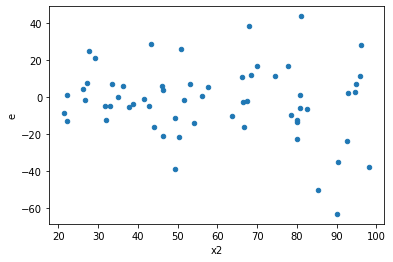

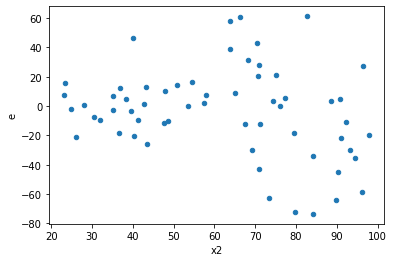

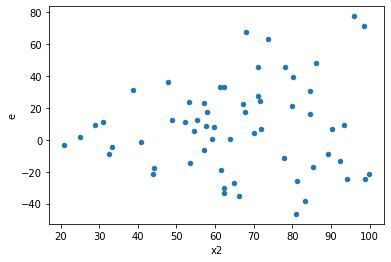

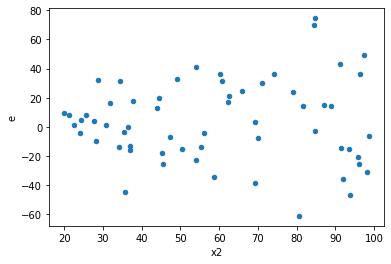

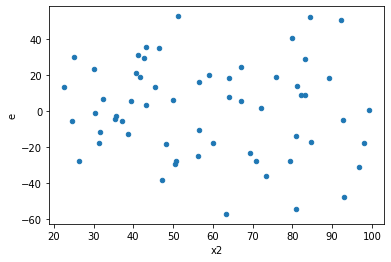

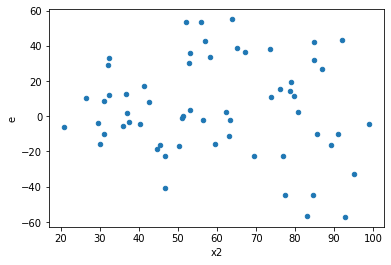

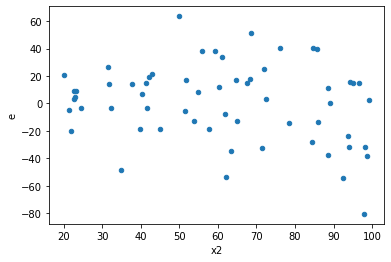

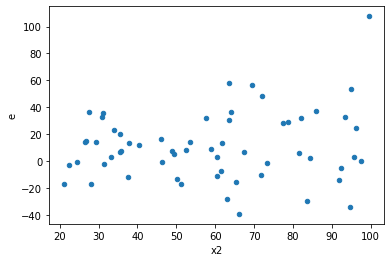

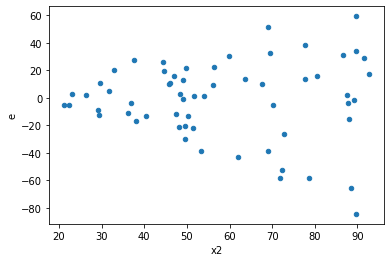

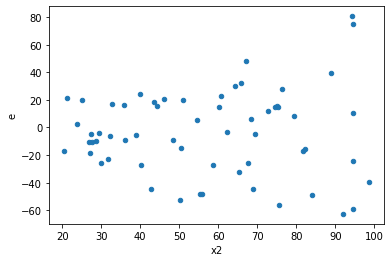

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,4084.743092624261,12319.391168830003,194.51157583925053,586.6376747061906,3.0159525065541777,0.014657118690861726,0.9926714406545691,0.007328559345430863,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,5459.546351831011,27588.509665783247,259.9783977062386,1313.7385555134879,5.05326045203933,0.0004745668811081405,0.9997627165594459,0.00023728344055407025,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,4881.566822201191,28146.993865374097,232.45556296196148,1340.3330412082903,5.765975329347655,0.00017545048904632488,0.9999122747554768,8.772524452316244e-05,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,6312.149428902898,29129.91629474077,300.57854423347135,1387.138871178132,4.614896498070354,0.0009170272373126842,0.9995414863813437,0.0004585136186563421,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,9196.894036618609,18012.6686329168,437.9473350770766,857.7461253769904,1.9585599835332512,0.13150338034041598,0.934248309829792,0.06575169017020799,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,8350.620257218217,20971.15128413706,397.64858367705796,998.6262516255744,2.5113285765820503,0.040350440323461134,0.9798247798382694,0.020175220161730567,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,9808.943611441864,17490.19496867956,467.09255292580303,832.8664270799791,1.7830865036554728,0.19338438067647346,0.9033078096617633,0.09669219033823673,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,5098.042468567034,23651.7600779035,242.76392707462068,1126.2742894239761,4.639380747361952,0.0008829997326431638,0.9995585001336784,0.0004414998663215819,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,4217.037808909788,33531.80228670174,200.8113242337994,1596.7524898429401,7.951506200834982,1.3191767595843729e-05,0.9999934041162021,6.595883797921864e-06,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,4084.743092624261,12319.391168830003,194.51157583925053,586.6376747061906,3.0159525065541777,0.014657118690861726,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,5459.546351831011,27588.509665783247,259.9783977062386,1313.7385555134879,5.05326045203933,0.0004745668811081405,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,4881.566822201191,28146.993865374097,232.45556296196148,1340.3330412082903,5.765975329347655,0.00017545048904632488,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,6312.149428902898,29129.91629474077,300.57854423347135,1387.138871178132,4.614896498070354,0.0009170272373126842,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,9196.894036618609,18012.6686329168,437.9473350770766,857.7461253769904,1.9585599835332512,0.13150338034041598,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,8350.620257218217,20971.15128413706,397.64858367705796,998.6262516255744,2.5113285765820503,0.040350440323461134,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,9808.943611441864,17490.19496867956,467.09255292580303,832.8664270799791,1.7830865036554728,0.19338438067647346,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,5098.042468567034,23651.7600779035,242.76392707462068,1126.2742894239761,4.639380747361952,0.0008829997326431638,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,4217.037808909788,33531.80228670174,200.8113242337994,1596.7524898429401,7.951506200834982,1.3191767595843729e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    602
Reject001=1 : Homoscedasticity      398
Name: Result_test, dtype: int64